In [12]:
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print('train_data')
print(x_train.shape)
print(y_train.shape)

print('test_data')
print(x_test.shape)
print(y_test.shape)

train_data
(50000, 32, 32, 3)
(50000, 1)
test_data
(10000, 32, 32, 3)
(10000, 1)


In [13]:
from sklearn.model_selection import train_test_split

# Train을 Train, Validation 데이터로 나누기 (섞음)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('validation data')
print(x_valid.shape)
print(y_valid.shape)

train data
(40000, 32, 32, 3)
(40000, 1)
validation data
(10000, 32, 32, 3)
(10000, 1)


In [14]:
# Scalar 형태의 레이블을 One-hot Encoding 형태로 변환
y_train = tf.squeeze(tf.one_hot(y_train, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 100), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('valid data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(40000, 32, 32, 3)
(40000, 100)
valid data
(10000, 32, 32, 3)
(10000, 100)
test data
(10000, 32, 32, 3)
(10000, 100)


In [15]:
# 랜덤하게 섞인 데이터셋 수 확인 (Test는 나누지 않았으므로 안섞임)
print('train data')
print(np.sum(y_train, axis=0))
print('validation data')
print(np.sum(y_valid, axis=0))

train data
[391. 408. 388. 398. 402. 402. 401. 406. 407. 406. 393. 395. 416. 395.
 407. 395. 405. 395. 403. 411. 399. 380. 406. 383. 390. 399. 398. 407.
 393. 379. 405. 408. 405. 409. 403. 400. 413. 402. 402. 387. 398. 409.
 403. 387. 410. 413. 404. 407. 386. 402. 389. 419. 400. 398. 392. 387.
 412. 402. 402. 408. 416. 405. 418. 382. 397. 405. 398. 403. 396. 405.
 385. 390. 388. 381. 393. 411. 393. 410. 411. 380. 407. 421. 399. 401.
 406. 394. 389. 405. 386. 402. 409. 414. 388. 398. 405. 402. 385. 395.
 405. 402.]
validation data
[109.  92. 112. 102.  98.  98.  99.  94.  93.  94. 107. 105.  84. 105.
  93. 105.  95. 105.  97.  89. 101. 120.  94. 117. 110. 101. 102.  93.
 107. 121.  95.  92.  95.  91.  97. 100.  87.  98.  98. 113. 102.  91.
  97. 113.  90.  87.  96.  93. 114.  98. 111.  81. 100. 102. 108. 113.
  88.  98.  98.  92.  84.  95.  82. 118. 103.  95. 102.  97. 104.  95.
 115. 110. 112. 119. 107.  89. 107.  90.  89. 120.  93.  79. 101.  99.
  94. 106. 111.  95. 114.  98.  91.  8

In [16]:
# 모델 설정

base_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)   # Output : 끝에서 2번째 까지 ~ FC Layer 출력 변경위함

# 출력 100개로 변경
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)  
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.0007)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [17]:
# 학습
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=25, validation_data=(x_valid, y_valid))

Epoch 1/25
1250/1250 [==============================] - 46s 37ms/step - loss: 4.7641 - acc: 0.0715 - val_loss: 4.7705 - val_acc: 0.0339
Epoch 2/25
1250/1250 [==============================] - 46s 37ms/step - loss: 4.2662 - acc: 0.1173 - val_loss: 4.0969 - val_acc: 0.1359
Epoch 3/25
1250/1250 [==============================] - 46s 37ms/step - loss: 4.0882 - acc: 0.1352 - val_loss: 6.1545 - val_acc: 0.1428
Epoch 4/25
1250/1250 [==============================] - 46s 37ms/step - loss: 3.7148 - acc: 0.1772 - val_loss: 6.5357 - val_acc: 0.1746
Epoch 5/25
1250/1250 [==============================] - 47s 37ms/step - loss: 3.5420 - acc: 0.2041 - val_loss: 15.0758 - val_acc: 0.0977
Epoch 6/25
1250/1250 [==============================] - 47s 37ms/step - loss: 3.3860 - acc: 0.2220 - val_loss: 3.7758 - val_acc: 0.2544
Epoch 7/25
1250/1250 [==============================] - 47s 37ms/step - loss: 3.1596 - acc: 0.2576 - val_loss: 2.9766 - val_acc: 0.2589
Epoch 8/25
1250/1250 [=========================

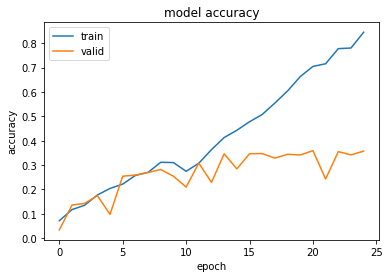

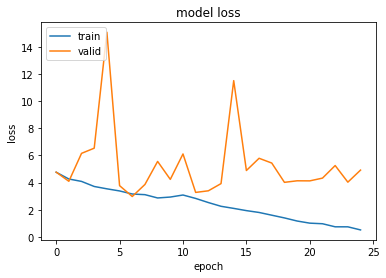

In [18]:
# Accuracy, Loss 그래프 출력
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [19]:
# Validation 정확도
print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

validation accuracy
0.3573000133037567
0.35929998755455017


In [20]:
# Test 정확도
results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

313/313 [==============================] - 3s 10ms/step - loss: 4.7014 - acc: 0.3580
test accuracy
0.3580000102519989
